<a href="https://colab.research.google.com/github/mipypf/scej-mi/blob/develop/example_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit==2024.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 8.7 MB/s eta 0:00:00


In [22]:
from rdkit.Chem import AllChem, Draw
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit import RDLogger
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

RDLogger.DisableLog('rdApp.*')

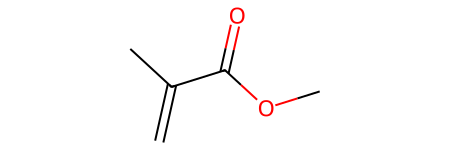

In [15]:
smiles = "CC(=C)C(=O)OC"  # メチルメタクリレート
mol = Chem.MolFromSmiles(smiles)
mol

In [16]:
descriptor_names = [desc[0] for desc in Descriptors.descList]
descriptors =[[desc[1](mol) for desc in Descriptors.descList]]
descriptors_df = pd.DataFrame(data, columns=descriptor_names, index=[smiles])
descriptors_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
CC(=C)C(=O)OC,10.189815,10.189815,0.347222,-0.347222,0.358508,7.714286,100.117,92.053,100.052429,40,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(Descriptors.descList)

[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x79f854d449a0>), ('MaxEStateIndex', <function MaxEStateIndex at 0x79f854d44860>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x79f854d44a40>), ('MinEStateIndex', <function MinEStateIndex at 0x79f854d44900>), ('qed', <function qed at 0x79f854d477e0>), ('SPS', <function SPS at 0x79f854d47d80>), ('MolWt', <function <lambda> at 0x79f854d47ce0>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x79f854d78540>), ('ExactMolWt', <function <lambda> at 0x79f854d785e0>), ('NumValenceElectrons', <function NumValenceElectrons at 0x79f854d78680>), ('NumRadicalElectrons', <function NumRadicalElectrons at 0x79f854d78720>), ('MaxPartialCharge', <function MaxPartialCharge at 0x79f854d78860>), ('MinPartialCharge', <function MinPartialCharge at 0x79f854d78900>), ('MaxAbsPartialCharge', <function MaxAbsPartialCharge at 0x79f854d789a0>), ('MinAbsPartialCharge', <function MinAbsPartialCharge at 0x79f854d78a40>), ('FpDensityMorgan1', <function Fp

In [29]:
fingerprint = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)]
fingerprint_df = pd.DataFrame(np.array(fingerprint, int))
fingerprint_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
